In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('AnalyticalCaseStudy.csv')
df.columns = df.columns.str.strip()
df.head()
# Display basic information about the dataset
#df_info = df.info()

# Display summary statistics
#df_summary = df.describe(include="all")

# Check for missing values
#missing_values = df.isnull().sum()

# Display unique values in categorical columns
#unique_values = {col: df[col].nunique() for col in df.select_dtypes(include=['object']).columns}


# Show results
#df_info, df_summary, missing_values, unique_values, df_head


,YEAR,Customer_num,Establishment_Date,Number_of_Emp,Profit,Sector,Region,Total Risk,Total Limit,Sales
0,2017,RATI9590GZD,36917,8.0,NaN,RETAIL-WHOLESALE,Marmara Region,70917.0,7000007.0,3
1,2015,RATI2539VHR,34389,21.0,32615.0,MANUFACTURING,Central Anatolia Region,682602.0,2354029.0,0
2,2010,RATI4481GNN,35089,7.0,282834.0,RETAIL-WHOLESALE,Mediterranean Region,115581.0,592922.0,0
3,2012,RATI4948THA,38084,34.0,35597.0,MANUFACTURING,Southeastern Anatolia Region,39334.0,2471021.0,1
4,2013,RATI8841WYZ,38831,15.0,134259.0,SERVICES,Aegean Region,71295.0,506238.0,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11357 entries, 0 to 11356
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YEAR                11357 non-null  int64  
 1   Customer_num        11357 non-null  object 
 2   Establishment_Date  11357 non-null  int64  
 3   Number_of_Emp       10771 non-null  float64
 4   Profit              8526 non-null   float64
 5   Sector              11357 non-null  object 
 6   Region              10118 non-null  object 
 7   Total Risk          11192 non-null  float64
 8   Total Limit         11192 non-null  float64
 9   Sales               11357 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 887.4+ KB


In [3]:
#numerical_features = df.select_dtypes(include=['float64', 'int64','int32']).columns
numerical_features = ['YEAR','Establishment_Date','Number_of_Emp','Profit','Total Risk','Total Limit']
categorical_features = df.select_dtypes(include=['object']).columns
df[numerical_features].describe()

,YEAR,Establishment_Date,Number_of_Emp,Profit,Total Risk,Total Limit
count,11357.000000,11357.000000,10771.000000,8.526000e+03,1.119200e+04,1.119200e+04
mean,2013.939421,37291.960729,16.611642,6.138343e+04,1.249427e+06,2.536513e+06
std,2.216296,2828.828350,84.039303,4.084090e+05,4.356318e+07,1.862993e+07
min,2010.000000,18.000000,1.000000,-1.828452e+07,0.000000e+00,2.831000e+03
25%,2012.000000,35427.000000,4.000000,1.349725e+04,1.197878e+05,5.153302e+05
50%,2014.000000,37804.000000,7.000000,4.505250e+04,3.953125e+05,1.291620e+06
75%,2016.000000,39445.000000,16.000000,1.165898e+05,1.006619e+06,2.931796e+06
max,2017.000000,42535.000000,3333.000000,3.724579e+06,4.602535e+09,1.894825e+09


In [4]:

missing_values = df.isnull().sum()

unique_values = {col: df[col].nunique() for col in df.select_dtypes(include=['object']).columns}

missing_values, unique_values

(YEAR                     0
 Customer_num             0
 Establishment_Date       0
 Number_of_Emp          586
 Profit                2831
 Sector                   0
 Region                1239
 Total Risk             165
 Total Limit            165
 Sales                    0
 dtype: int64,
 {'Customer_num': 4492, 'Sector': 4, 'Region': 7})

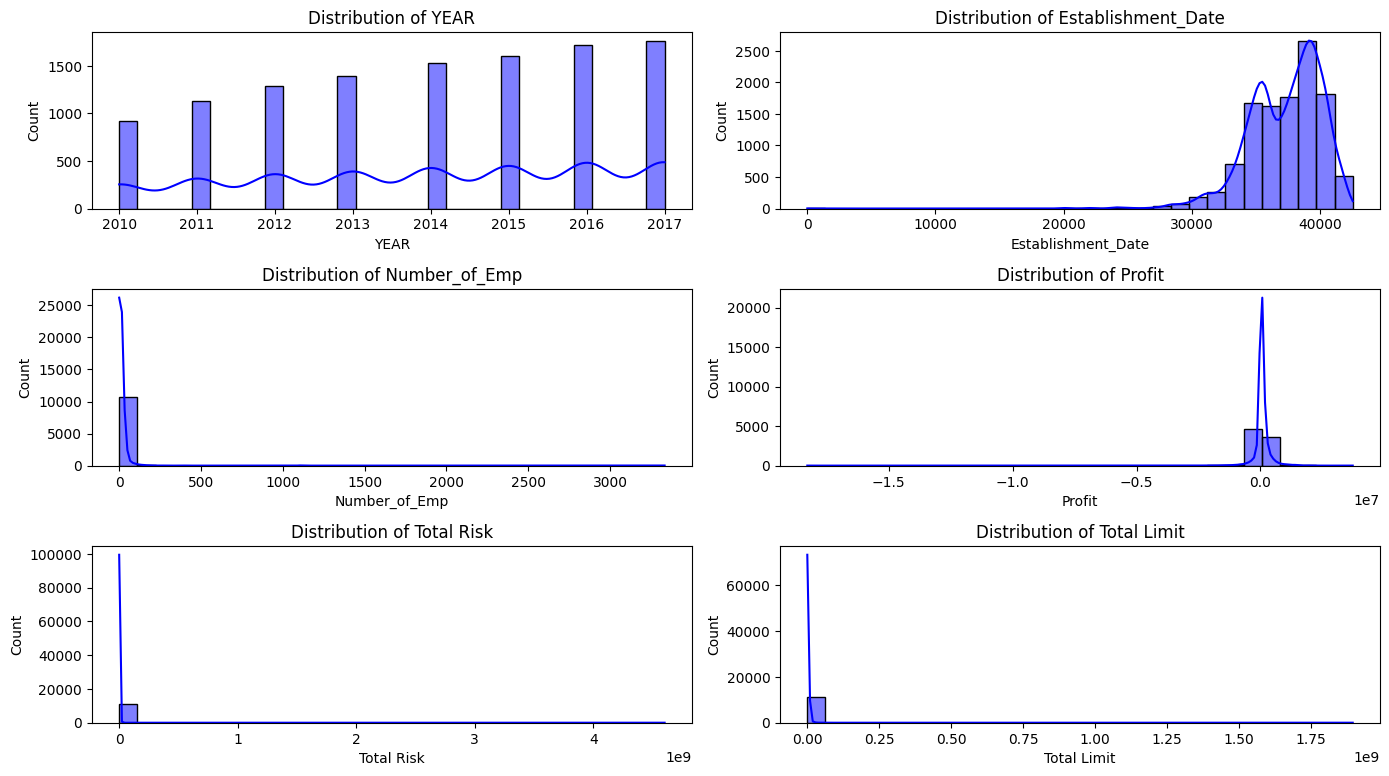

In [5]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical features for analysis
#numerical_features = ['Number_of_Emp', 'Profit', 'Total Risk', 'Total Limit']

# Create histograms for numerical variables
plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[col], bins=30, kde=True, color="blue")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

# Compute basic statistics
#basic_statistics = df[numerical_features].describe()



**Slide 3: Data Exploration – Basic Statistics & Distributions** 

1. Key Observations from Summary Statistics

📊 Descriptive Analysis of Numeric Variables

YEAR:

* Data ranges from 2010 to 2017, with a mean year of 2013.94.

* No missing values, but slightly imbalanced distributions per year.

Establishment Date:

* The mean establishment date is 37,291, which seems incorrect because it is stored as a numerical format rather than an actual year.

* Needs transformation to a proper date format (e.g., converting to real years).

* Number of Employees:

* Mean: 16.6 employees, but high standard deviation (84 employees) → Indicates extreme variability in company sizes.

* Min: 1 employee, Max: 3,333 employees → Some companies have significantly more employees than others.

* Possible Outliers: Companies with thousands of employees may need further investigation.

Profit:

* Mean: 61,383 TL, but very high standard deviation (408,409 TL) → Suggests extreme variations in profit values.

* Negative values detected (Min: -18,284,520 TL) → Some companies are loss-making, which may need separate analysis.

Total Risk & Total Limit:

* High variability, with values ranging from 0 TL to billions of TL.

* Extreme outliers detected, suggesting that some companies have unusually high risk or credit limits.

* May need log transformation or outlier removal for better analysis.

2. Insights from Histogram Distributions

* All numeric variables are highly right-skewed, meaning most companies have small values, while a few have extremely large values (outliers).

* Profit distribution shows a strong peak around 0 TL, suggesting that most companies operate with low profit or break-even points.

* Number of Employees, Total Risk, and Total Limit show extreme variations, where a small number of companies have very high values, possibly affecting model accuracy.

3. Potential Data Issues Detected

Data Quality Problems Identified

1. Incorrect Date Format

* Establishment_Date appears in a numeric format (e.g., 37,291 instead of 1998).

* Needs conversion to proper year format to calculate company age correctly.

2. Extreme Outliers

* Total Risk, Total Limit, and Profit have extremely large values, which may distort model training.

* Possible solutions: Log transformation or outlier removal.

3. Missing Values in Employee Count & Profit

* Some companies lack employee count and profit data → Need imputation or further investigation.

4. Negative Profit Values

* Some companies show significant financial losses → May require separate classification for loss-making firms.


Slide 8) Do you think this data is suitable for modeling, if it is not, what improvements should be done? 

1. Is This Data Suitable for Modeling?
📊 Partially, but it has limitations that need improvement.
While the dataset provides useful financial and risk-related features, it has several issues that may impact model performance:

✅ Strengths of the Dataset:

* Includes financial indicators like Total Risk, Profit, and Credit Limits, which are relevant for predicting sales.

* Covers a broad time range (2010-2017), allowing for temporal insights.

* Contains categorical features (Sector, Region), which provide segmentation insights.

❌ Limitations That May Affect Model Performance:

Data Quality Issues:

* Establishment_Date is stored in an incorrect numeric format, making it difficult to compute company experience.

* Negative values in Profit may distort model learning.

* Missing values in key columns (Profit, Number of Employees) can reduce accuracy.

Severe Class Imbalance:

* Originally, most companies belonged to the low-sales category (Sales = 0), making it difficult for the model to learn patterns for high-sales companies (Sales = 1).

Improvements: Applied undersampling to balance class distribution.

Presence of Outliers:

* Total Risk, Total Limit, and Profit contain extreme values, affecting the model’s ability to generalize.

Solution: Use log transformation or remove extreme outliers to improve distribution.

Feature Engineering Opportunities:

* The dataset lacks macroeconomic factors (e.g., inflation, industry trends), which could improve predictions.

* Additional financial ratios (Debt-to-Equity, Liquidity Ratio, Revenue per Employee) could provide better insights.



2. Improvements to Make the Data More Suitable for Modeling

✅ Fix Data Quality Issues

* Convert Establishment_Date into proper year format to accurately compute company experience.

* Impute missing values using median (for numeric values) and mode (for categorical variables).

* Handle negative profit values by either treating them separately (loss-making companies) or converting them to absolute values.

✅ Balance the Dataset

* Undersample Sales = 0 to avoid overfitting to the majority class and improve recall for high-sales companies.

✅ Address Outliers & Skewed Distributions

* Apply log transformation to Profit, Total Risk, and Total Limit to reduce skewness.

* Identify and remove extreme outliers using Interquartile Range (IQR) filtering.

✅ Enhance Feature Engineering

* Compute financial ratios like Debt-to-Equity, Liquidity, and Profitability ratios to capture financial health better.

* Consider adding external factors like industry benchmarks or economic conditions to improve predictive power.



In [6]:
import pandas as pd

# Create a structured summary table for the presentation
data_suitability_table = pd.DataFrame({
    "Aspect": [
        "Data Quality Issues",
        "Class Imbalance",
        "Outliers & Skewed Distributions",
        "Feature Engineering",
        "Model Performance"
    ],
    "Current Challenges": [
        "Incorrect Establishment Date format, missing values in Profit & Employee Count, negative Profit values",
        "Sales = 0 is overrepresented, making it harder for the model to learn Sales = 1 patterns. Lack of information on Sales = 3",
        "Extreme values in Profit, Total Risk, and Total Limit skew the distribution",
        "Lack of financial ratios, macroeconomic indicators, and industry benchmarks",
        "Limited predictive power due to data quality issues and lack of relevant features"
    ],
    "Proposed Improvements": [
        "Convert date to year format, impute missing values, handle negative profits properly if needed",
        "Undersample Sales = 0 to balance class distribution. Drop Sales = 3 if not relevant",
        "Apply log transformation or any other normalization, remove extreme outliers",
        "Add Debt-to-Equity, Liquidity Ratio, Revenue per Employee, and external economic factors If available",
        "Test different models (Random Forest, XGBoost), apply cross-validation, improve feature selection"
    ]
})

Slide 9-10) 

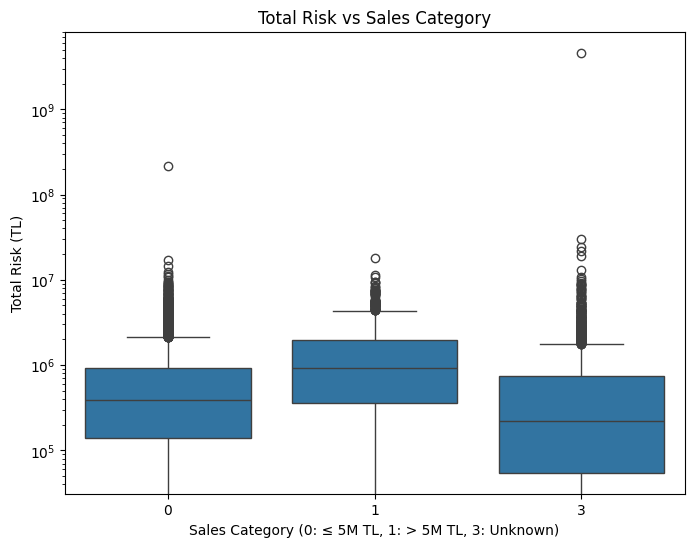

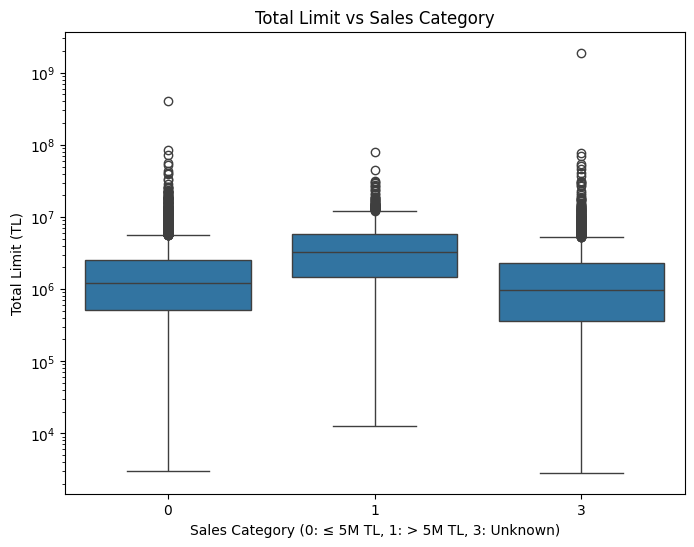

In [8]:
# Scatter plot to examine relationship between Total Risk and Sales
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Sales'], y=df['Total Risk'])
plt.title("Total Risk vs Sales Category")
plt.xlabel("Sales Category (0: ≤ 5M TL, 1: > 5M TL, 3: Unknown)")
plt.ylabel("Total Risk (TL)")
plt.yscale("log")  # Log scale to handle skewed data
plt.show()

# Scatter plot to examine relationship between Total Limit and Sales
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Sales'], y=df['Total Limit'])
plt.title("Total Limit vs Sales Category")
plt.xlabel("Sales Category (0: ≤ 5M TL, 1: > 5M TL, 3: Unknown)")
plt.ylabel("Total Limit (TL)")
plt.yscale("log")  # Log scale for better visualization
plt.show()



The boxplots show the distribution of Total Risk and Total Limit for different sales categories:

**Total Risk vs Sales:**

* Companies with Sales > 5M TL (1) tend to have higher Total Risk.
* However, there is an overlap, indicating that some firms with high risk still have low sales (0).

**Total Limit vs Sales:**

* Similar to Total Risk, higher Total Limit is more common among firms with high sales, but the overlap remains.

In [9]:
from scipy.stats import chi2_contingency

# Create a binary column for 'High Risk' (1 if Total Risk > 5M, 0 otherwise)
df['High_Risk'] = (df['Total Risk'] > 5_000_000).astype(int)

# Create a contingency table
contingency_table = pd.crosstab(df['High_Risk'], df['Sales'].replace(3, None))  # Exclude unknown sales (3)

correlation = df[['Total Risk', 'Sales']].corr().iloc[0, 1]

# Chi-square test for independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display results
#contingency_table, p
print("P Value: ",p)
print("Correlation: ",correlation)
contingency_table


P Value:  9.757428155423368e-13
Correlation:  0.014922232456797514


Sales,0,1
High_Risk,,
0,7001,1387
1,83,55


In [10]:
# Create a binary column for Mr. Yılmaz's assumption: "Total Risk > 5 million TL"
import numpy as np
df['Risk_Above_5M'] = (df['Total Risk'] > np.log1p(5_000_000)).astype(int)

# Compute the proportion of companies where Risk > 5M and Sales > 5M (Sales=1)
risk_sales_crosstab = pd.crosstab(df['Risk_Above_5M'], df['Sales'].replace(3, None), normalize='index')

# Compute statistical correlation between Total Risk and Sales
correlation = df[['Total Risk', 'Sales']].corr().iloc[0, 1]

# Perform Chi-Square test to check dependency between Total Risk and Sales
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(df['Risk_Above_5M'], df['Sales'].replace(3, None))

# Perform Chi-Square Test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Display the results
#risk_sales_crosstab, correlation, p_value
print("P Value: ",p)
print("Correlation: ",correlation)
contingency_table
risk_sales_crosstab


P Value:  9.757428155423368e-13
Correlation:  0.014922232456797514


Sales,0,1
Risk_Above_5M,,
0,0.907143,0.092857
1,0.829597,0.170403


**Hypothesis Testing: Verify if firms with Total Risk > 5M TL are statistically more likely to have Sales > 5M TL.**
 ​​
**Statistical Test Results:**

Contingency Table (High Risk vs Sales):

High Risk (Total Risk > 5M TL)
* Sales ≤ 5M TL: 83 companies
* Sales > 5M TL: 55 companies

Low Risk (Total Risk ≤ 5M TL)

* Sales ≤ 5M TL: 7,001 companies
* Sales > 5M TL: 1,387 companies

Chi-Square Test (p-value ≈ 9.76e-13):

* The p-value is extremely small (< 0.05), meaning there is a statistically significant relationship between Total Risk and Sales.
* However, the number of high-risk firms with sales ≤ 5M TL (83) is greater than those with sales > 5M TL (55), contradicting Mr. Yılmaz’s claim.

Interpretation:
* While higher Total Risk is correlated with higher sales, not all high-risk firms have sales > 5M TL.
* The assumption is not universally valid, and a better predictive model would be needed.

Slide 11) How do you calculate experience in sector of clients? Do you think this variable is related to net sales as Mrs. Sevinç stated? 

In [12]:
# Investigate the format of Establishment_Date
df['Establishment_Date'].astype(int).sort_values().unique()[:20]  # Checking unique values for pattern recognition

# Hypothesis: If values represent "days since a reference year", find a reasonable reference point
# Testing conversion using Excel-style date system (assuming 1900 as a base year)
reference_year = 1895
df['Converted_Establishment_Year'] = pd.to_datetime(df['Establishment_Date'], origin=f'{reference_year}-01-01', unit='D').dt.year

# Check if the converted values make sense
df[['Establishment_Date', 'Converted_Establishment_Year']].head(10)


,Establishment_Date,Converted_Establishment_Year
0,36917,1996
1,34389,1989
2,35089,1991
3,38084,1999
4,38831,2001
5,39109,2002
6,36693,1995
7,35878,1993
8,40125,2004
9,38704,2000


In [13]:
from scipy.stats import chi2_contingency

# Create a binary column for 'High Risk' (1 if Total Risk > 5M, 0 otherwise)
#df['High_Risk'] = (df['Total Risk'] > 5_000_000).astype(int)
#df_ = df[df['Sales'] != 3]
# Create a contingency table
contingency_table = pd.crosstab(df['Converted_Establishment_Year'], df['Sales'].replace(3, None))  # Exclude unknown sales (3)

correlation = df[['Converted_Establishment_Year', 'Sales']].corr().iloc[0, 1]

# Chi-square test for independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display results
#contingency_table, p
print("P Value: ",p)
print("Correlation: ",correlation)
#contingency_table


P Value:  1.780351883595109e-18
Correlation:  -0.0712286282249755


### **II. Model**

In [15]:
### Some plotting before model selection to see non-linear relationships
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('AnalyticalCaseStudy.csv')
df.columns = df.columns.str.strip()
# Drop rows where Sales is 3 (unknown sales)
df = df[df['Sales'] != 3]

# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# Handle with Outliers
import pandas as pd

# Copy and filter data where Sales is not 3
filtered_df = df[df['Sales'] != 3].copy()

# Get list of numerical features excluding the target
numerical_features = filtered_df.select_dtypes(include=['number']).columns.drop('Sales')

# Remove outliers using IQR method
for col in numerical_features:
    Q1 = filtered_df[col].quantile(0.25)
    Q3 = filtered_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter within bounds
    filtered_df = filtered_df[(filtered_df[col] >= lower_bound) & (filtered_df[col] <= upper_bound)]

print(f"Remaining rows after outlier removal: {filtered_df.shape[0]}")


Remaining rows after outlier removal: 5570


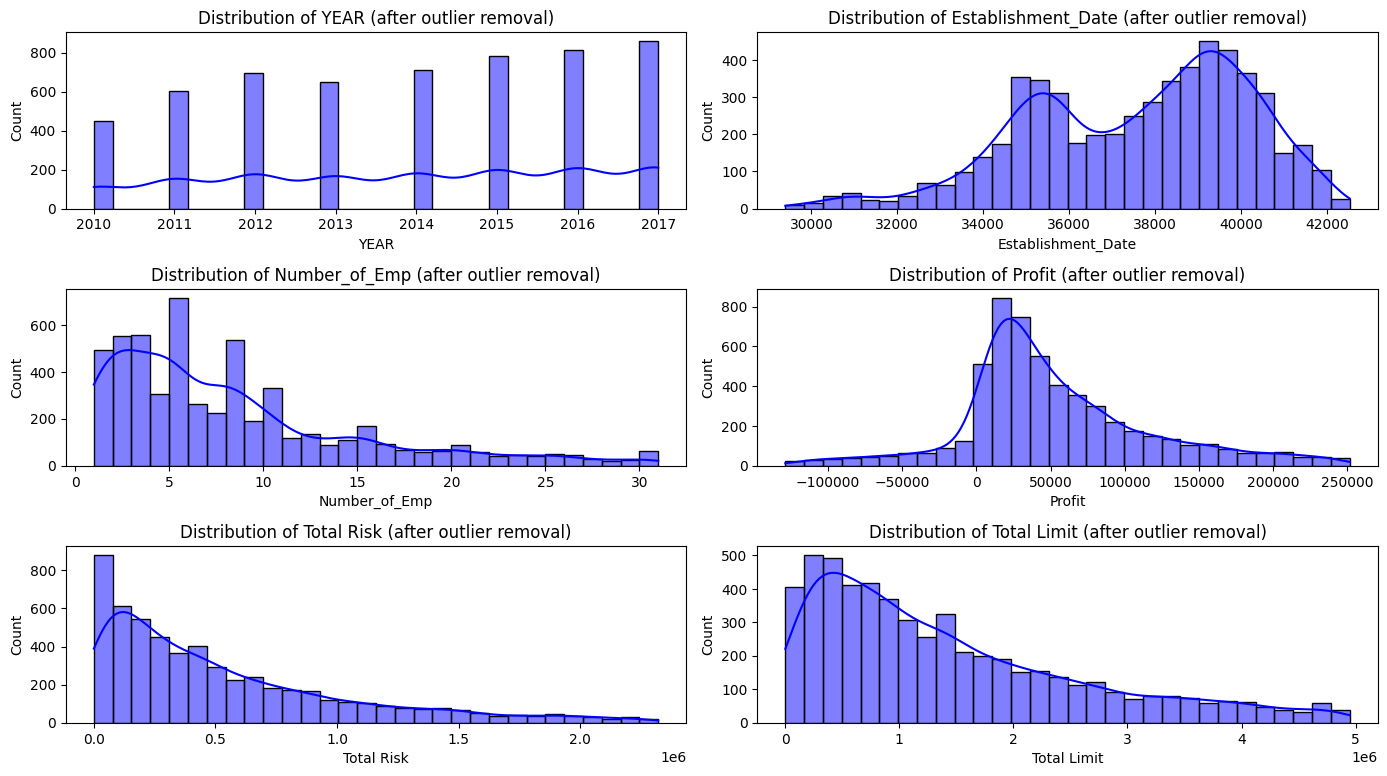

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots of all numerical features (excluding Sales)
'''for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=filtered_df['Sales'],y=filtered_df[col])
    plt.title(f'Boxplot of {col} (After Outlier Removal)')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()'''
# Create histograms for numerical variables
plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(4, 2, i)
    sns.histplot(filtered_df[col], bins=30, kde=True, color="blue")
    plt.title(f"Distribution of {col} (after outlier removal)")

plt.tight_layout()
plt.show()


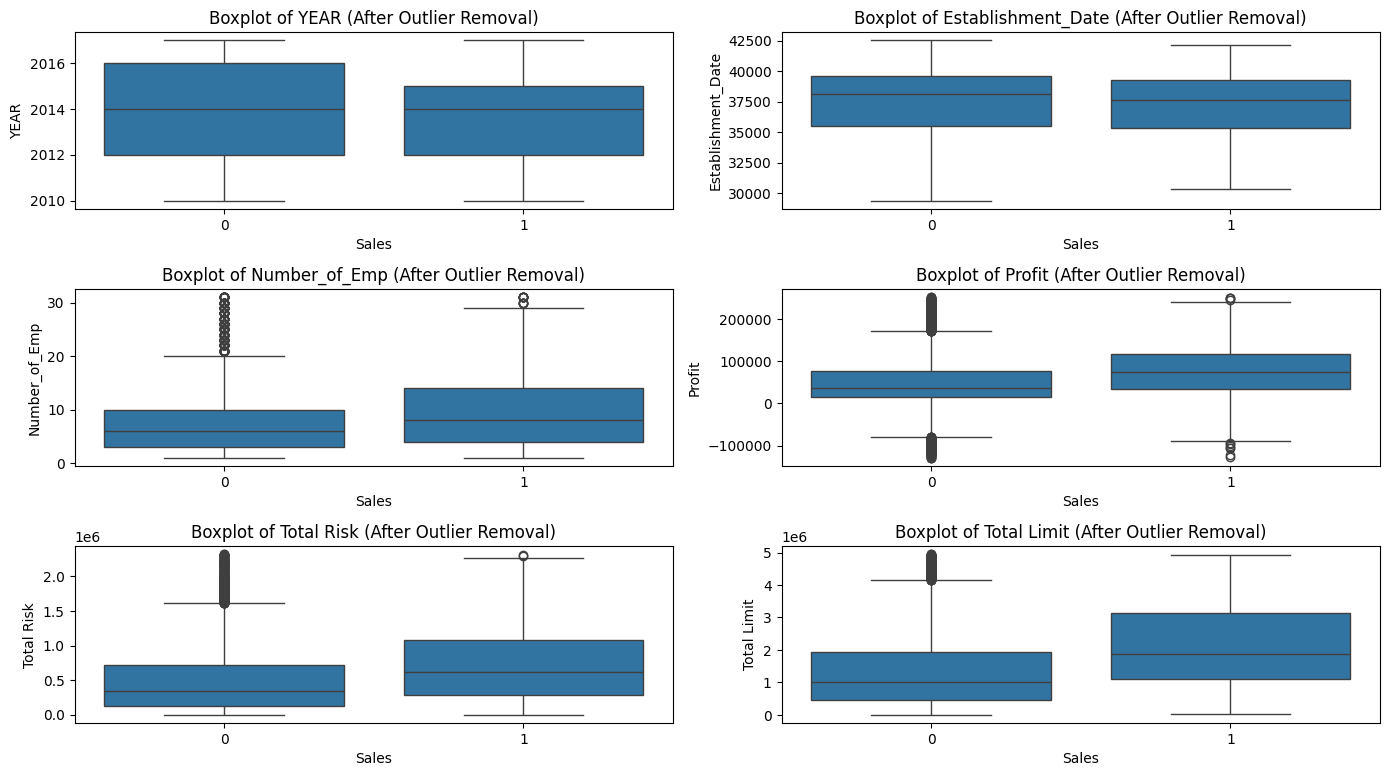

In [24]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=filtered_df['Sales'],y=filtered_df[col])
    plt.title(f'Boxplot of {col} (After Outlier Removal)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

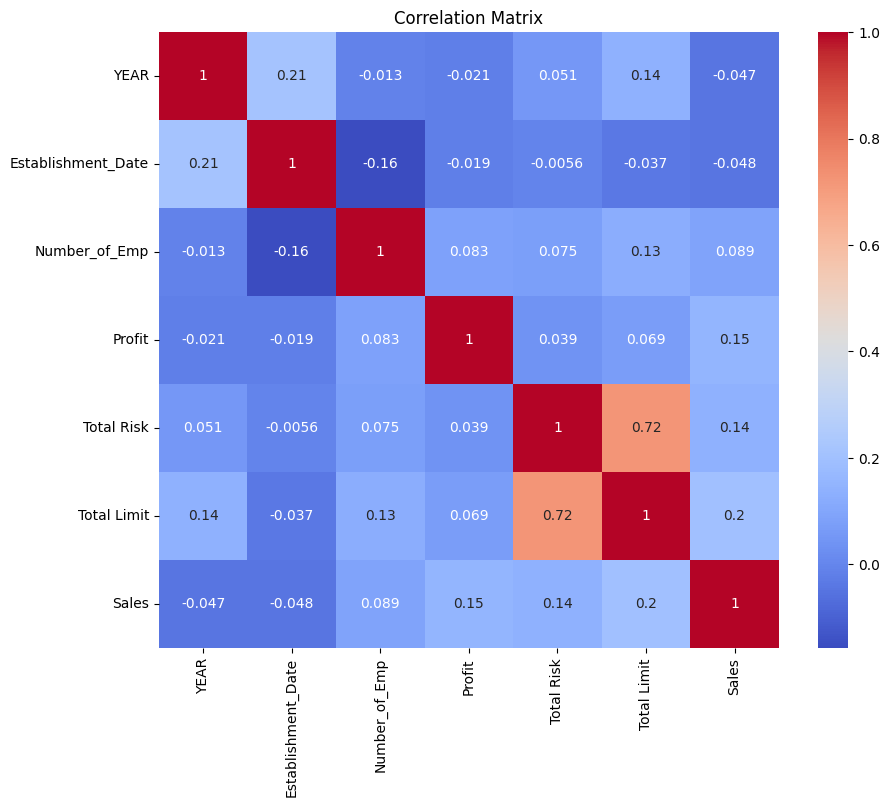

In [30]:
plt.figure(figsize=(10, 8))
num2 = filtered_df.select_dtypes(include=['number']).columns

sns.heatmap(filtered_df[num2].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

**Analysis of Non-Linearity in Data**

Based on visualizations

1) Boxplots (Feature Distributions vs Sales)

* Some features show clear differences between Sales=0 and Sales=1 (good separability):

* Total Limit: Higher median for Sales=1, but some overlap.

* Total Risk: Similar trend, indicating a potential relationship.

* Profit: Some difference, but still has overlapping ranges.

* Some features do not show strong differences:

* YEAR and Establishment_Date are nearly identical across Sales groups, meaning they might not be strong predictors.

* Number_of_Emp has many overlapping values, which might reduce its predictive power.

**Conclusion:**

* Total Risk and Total Limit may be useful, but their overlap suggests a non-linear decision boundary—indicating a Random Forest or Gradient Boosting model would work better than a linear model.

* YEAR and Establishment_Date might be weak predictors unless we transform them (e.g., converting Establishment_Date into "Company Age").

2) Correlation Matrix

* Weak correlation of features with Sales:

* The highest correlation is 0.20 (Total Limit), which is quite low.

* Profit and Total Risk are also weakly correlated with Sales.

* Number_of_Emp, YEAR, and Establishment_Date are near zero, meaning they likely contribute little in a simple linear model.

**Conclusion:**

* The low correlation values indicate that simple linear relationships are not strong, suggesting that Sales depends on complex feature interactions.

* Random Forest or Gradient Boosting can help capture these hidden interactions, making them more suitable than Logistic Regression.

3) Histograms & Distribution Analysis

* Total Risk and Total Limit are right-skewed, meaning they have many small values and a few large ones.
* Profit has negative values, which might indicate businesses with losses.
* Number_of_Emp is highly imbalanced, with most values in the lower range.

**Conclusion:**

* Since distributions are not normal, transformations (like log-scaling) might help improve model performance.
* Decision trees (like Random Forest or XGBoost) handle skewed data better than linear models, making them a strong choice.

Final Verdict: Is Non-Linearity Present?

**YES!**

* Low correlations + overlapping boxplots suggest that a simple linear model will struggle.
* Non-linear models like Random Forest, XGBoost, or Neural Networks will likely perform better than Logistic Regression.

##### Continue with Data Preprocessing

**For now, Sales=3 is out, missing values are handled, outliers are removed.**

**Done**

* Sales=3 out.
* Missing Values
* Outliers

**Rest**

* Establishment Date Conversion 
* Solve Imbalanced Sales distribution
* Normalization if needed.

In [32]:
# Investigate the format of Establishment_Date
df = filtered_df.copy()
df['Establishment_Date'].astype(int).sort_values().unique()[:20]  # Checking unique values for pattern recognition

# Hypothesis: If values represent "days since a reference year", find a reasonable reference point
# Testing conversion using Excel-style date system (assuming 1900 as a base year)
reference_year = 1895
df['Converted_Establishment_Year'] = pd.to_datetime(df['Establishment_Date'], origin=f'{reference_year}-01-01', unit='D').dt.year

# Check if the converted values make sense
df[['Establishment_Date', 'Converted_Establishment_Year']].head(10)

,Establishment_Date,Converted_Establishment_Year
1,34389,1989
4,38831,2001
6,36693,1995
8,40125,2004
9,38704,2000
10,40054,2004
11,38912,2001
13,39862,2004
17,37279,1997
19,35729,1992


In [33]:
df.shape

(5570, 11)

In [39]:
df_2 = filtered_df.copy()
numerical_features = df_2.select_dtypes(include=['float64', 'int64','int32']).columns
categorical_features = df_2.select_dtypes(include=['object']).columns
numerical_features

Index(['YEAR', 'Establishment_Date', 'Number_of_Emp', 'Profit', 'Total Risk',
       'Total Limit', 'Sales'],
      dtype='object')

In [43]:
from sklearn.utils import resample
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df_2 = df_2[numerical_features]

# Step 1: Separate majority and minority classes
df_majority = df_2[df_2['Sales'] == 0]  # Majority class (Sales = 0)
df_minority = df_2[df_2['Sales'] == 1]  # Minority class (Sales = 1)

# Step 2: Undersample the majority class (Sales = 0) to match the size of Sales = 1
df_majority_undersampled = resample(df_majority,
                                    replace=False,  # No replacement, just downsampling
                                    n_samples=len(df_minority),  # Match the minority class size
                                    random_state=42)

# Step 3: Combine the undersampled majority class with the minority class
df_balanced = pd.concat([df_majority_undersampled, df_minority])

# Step 4: Define Features and Target Variable
#X_balanced = df_balanced.drop(['Sales', 'Customer_num'], axis=1)
X_balanced = df_balanced.drop(['Sales'], axis=1)
y_balanced = df_balanced['Sales']

# Step 5: Split Data into Training and Testing Sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)



#Step 6: Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 7: Make Predictions
y_pred = rf_model.predict(X_test)

# Step 8: Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
accuracy, conf_matrix, class_report


(0.7232142857142857,
 array([[81, 31],
        [31, 81]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.72      0.72      0.72       112\n           1       0.72      0.72      0.72       112\n\n    accuracy                           0.72       224\n   macro avg       0.72      0.72      0.72       224\nweighted avg       0.72      0.72      0.72       224\n')

In [44]:
distinct_categories = {col: df[col].nunique() for col in categorical_features}
print(distinct_categories)

{'Customer_num': 3040, 'Sector': 4, 'Region': 7}


Both Random Forest and XGBoost require numerical inputs, so we have two main encoding strategies:

Option 1: One-Hot Encoding (Best for Random Forest)

* Works well if the number of categories is small.

Option 2: Label Encoding (Best for XGBoost)

* Assigns numbers to categories:

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Define function to evaluate models
def evaluate_model(model_name, y_true, y_pred, y_proba):
    accuracy = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    class_report_dict = classification_report(y_true, y_pred, output_dict=True)
    class_report = pd.DataFrame(class_report_dict).transpose()
    display(class_report)

    print(f"🔹 Model: {model_name}")
    print(f"✅ Accuracy: {accuracy:.4f}")
    print("\nConfusion Matrix:\n", conf_matrix)
    print("\nClassification Report:\n", class_report)

    # Plot Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

    # ROC-AUC Curve
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    auc_score = roc_auc_score(y_true, y_proba)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.4f})')
    plt.plot([0, 1], [0, 1], 'r--')  # Baseline
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve: {model_name}")
    plt.legend()
    plt.show()

    return accuracy, auc_score, class_report


'\n# **Evaluate Random Forest**\ny_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # Probability for class 1\nrf_results = evaluate_model("Random Forest", y_test, y_pred, y_proba_rf)\n\n# **Evaluate XGBoost**\ny_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]  # Probability for class 1\nxgb_results = evaluate_model("XGBoost", y_test, y_pred_xgb, y_proba_xgb)\n\n# Compare Accuracy & AUC Score\nprint("\n🔍 Model Comparison:")\nprint(f"Random Forest - Accuracy: {rf_results[0]:.4f}, AUC: {rf_results[1]:.4f}")\nprint(f"XGBoost - Accuracy: {xgb_results[0]:.4f}, AUC: {xgb_results[1]:.4f}")'

,precision,recall,f1-score,support
0,0.75,0.75,0.75,112.00
1,0.75,0.75,0.75,112.00
accuracy,0.75,0.75,0.75,0.75
macro avg,0.75,0.75,0.75,224.00
weighted avg,0.75,0.75,0.75,224.00


🔹 Model: Random Forest
✅ Accuracy: 0.7500

Confusion Matrix:
 [[84 28]
 [28 84]]

Classification Report:
               precision  recall  f1-score  support
0                  0.75    0.75      0.75   112.00
1                  0.75    0.75      0.75   112.00
accuracy           0.75    0.75      0.75     0.75
macro avg          0.75    0.75      0.75   224.00
weighted avg       0.75    0.75      0.75   224.00


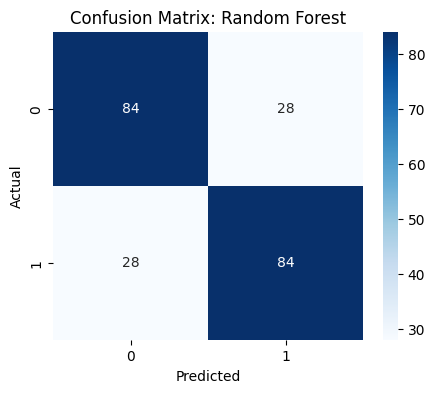

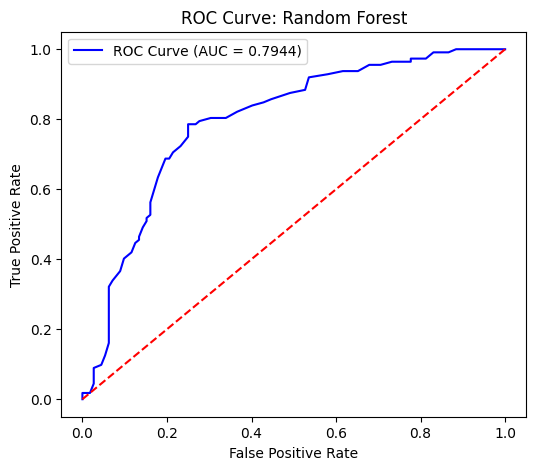

(0.75,
 0.7944435586734693,
               precision  recall  f1-score  support
 0                  0.75    0.75      0.75   112.00
 1                  0.75    0.75      0.75   112.00
 accuracy           0.75    0.75      0.75     0.75
 macro avg          0.75    0.75      0.75   224.00
 weighted avg       0.75    0.75      0.75   224.00)

In [65]:
# Last with Normalization
from sklearn.utils import resample
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
from sklearn.preprocessing import StandardScaler

#df_2 = df_2[numerical_features]
df_2 = filtered_df.copy()

# Step 1: Separate majority and minority classes
df_majority = df_2[df_2['Sales'] == 0]  # Majority class (Sales = 0)
df_minority = df_2[df_2['Sales'] == 1]  # Minority class (Sales = 1)

# Step 2: Undersample the majority class (Sales = 0) to match the size of Sales = 1
df_majority_undersampled = resample(df_majority,
                                    replace=False,  # No replacement, just downsampling
                                    n_samples=len(df_minority),  # Match the minority class size
                                    random_state=42)

# Step 3: Combine the undersampled majority class with the minority class
df_balanced = pd.concat([df_majority_undersampled, df_minority])

# Apply One Hot Encoding to categorical features
categorical_features = ['Sector', 'Region']
df_balanced = pd.get_dummies(df_balanced, columns=categorical_features, drop_first=True)

# Step 4: Define Features and Target Variable
X_balanced = df_balanced.drop(['Sales', 'Customer_num'], axis=1)
#X_balanced = df_balanced.drop(['Sales'], axis=1)
y_balanced = df_balanced['Sales']


# Apply log scaling using log1p to avoid issues with zeros or negative values if any
X_balanced['Total Risk'] = np.log1p(X_balanced['Total Risk'])
X_balanced['Total Limit'] = np.log1p(X_balanced['Total Limit'])

# Define numerical features

numerical_features = ['YEAR', 'Establishment_Date', 'Number_of_Emp', 'Profit', 'Total Risk', 'Total Limit']


# Step 5: Split Data into Training and Testing Sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)



#Step 6: Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 7: Make Predictions
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

evaluate_model("Random Forest", y_test, y_pred, y_proba)


1. Confusion Matrix Insights

84 True Positives (TP) → Correctly predicted Sales = 1
84 True Negatives (TN) → Correctly predicted Sales = 0
28 False Positives (FP) → Predicted Sales = 1, but it was actually Sales = 0
28 False Negatives (FN) → Predicted Sales = 0, but it was actually Sales = 1

Key Takeaways:

* The false positive and false negative rates are still relatively high.
* The model is balanced in terms of detecting Sales = 0 and Sales = 1 (precision and recall are equal).
* Potential Overfitting? The fact that precision and recall are similar suggests the model is performing consistently, but improvements can still be made.

2. ROC Curve & AUC Score

* AUC Score = 0.7944 → Slightly better than before (0.7919), meaning better discrimination between Sales=0 and Sales=1.
* The ROC curve shows good separation from the random baseline (red dashed line), but there’s still room for improvement.

⚠️ Key Takeaways:

* AUC > 0.79 is decent, but ideally, we'd aim for 0.85+ for strong classification.
* Misclassification rates (FP & FN) suggest further tuning or feature engineering could help.



In [68]:
import pandas as pd

summary_findings = pd.DataFrame({
    "Metric": [
        "Precision",
        "Recall",
        "F1-Score",
        "ROC AUC Score",
        "Confusion Matrix Observations"
    ],
    "Value": [
        "75% for both classes",
        "75% for both classes",
        "75%",
        "0.79",
        "Balanced (~25% FP & FN)"
    ],
    "Comments": [
        "When the model predicts a company has >5M TL Sales, it is correct 75% of the time.",
        "The model captures 75% of actual high-sales companies.",
        "Performance is balanced across classes, but there is room for improvement.",
        "The model distinguishes between classes 79.44% of the time; ideally, AUC > 0.85 is desired.",
        "False positives and false negatives are roughly equal (~25%), indicating similar misclassification rates in both directions."
    ]
})
pd.set_option("display.max_colwidth", None)
summary_findings

,Metric,Value,Comments
0,Precision,75% for both classes,"When the model predicts a company has >5M TL Sales, it is correct 75% of the time."
1,Recall,75% for both classes,The model captures 75% of actual high-sales companies.
2,F1-Score,75%,"Performance is balanced across classes, but there is room for improvement."
3,ROC AUC Score,0.79,"The model distinguishes between classes 79.44% of the time; ideally, AUC > 0.85 is desired."
4,Confusion Matrix Observations,Balanced (~25% FP & FN),"False positives and false negatives are roughly equal (~25%), indicating similar misclassification rates in both directions."


In [71]:
import pandas as pd

# Create DataFrame
new_features_df = pd.DataFrame({
    "Category": ["Financial", "Financial", "Financial", "Financial", "Market", "Market", "Employee"],
    "Feature": [
        "Avg. Monthly Credit Usage",
        "Loan Repayment Behavior",
        "Revenue Growth Rate",
        "Number of Bank Transactions",
        "Sector Growth Rate",
        "Market Share Proxy",
        "Employee Growth Rate"
    ],
    "Importance": [
        "Measures cash flow & liquidity",
        "Indicates financial health & stability",
        "Shows expanding businesses",
        "High activity suggests higher sales",
        "Some industries grow faster than others",
        "Leading firms have more sales",
        "Growing workforce correlates with revenue growth"
    ]
})

# Display DataFrame
#print(new_features_df)

# Save as CSV (optional)
#new_features_df.to_csv("new_features.csv", index=False)
new_features_df


,Category,Feature,Importance
0,Financial,Avg. Monthly Credit Usage,Measures cash flow & liquidity
1,Financial,Loan Repayment Behavior,Indicates financial health & stability
2,Financial,Revenue Growth Rate,Shows expanding businesses
3,Financial,Number of Bank Transactions,High activity suggests higher sales
4,Market,Sector Growth Rate,Some industries grow faster than others
5,Market,Market Share Proxy,Leading firms have more sales
6,Employee,Employee Growth Rate,Growing workforce correlates with revenue growth


#### HyperParameter Tunning

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for tuning Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples at a leaf node
    'bootstrap': [True, False]  # Whether to bootstrap samples when building trees
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)

# Train using GridSearchCV on the balanced dataset
grid_search.fit(X_train, y_train)

# Best parameters found
best_params = grid_search.best_params_

# Train the best model with tuned hyperparameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# Make predictions with the tuned model
y_pred_best = best_rf_model.predict(X_test)

# Evaluate tuned model performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

# Display results
best_params, accuracy_best, conf_matrix_best, class_report_best


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


({'bootstrap': True,
  'max_depth': None,
  'min_samples_leaf': 4,
  'min_samples_split': 2,
  'n_estimators': 200},
 0.7232142857142857,
 array([[79, 33],
        [29, 83]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.73      0.71      0.72       112\n           1       0.72      0.74      0.73       112\n\n    accuracy                           0.72       224\n   macro avg       0.72      0.72      0.72       224\nweighted avg       0.72      0.72      0.72       224\n')

**NO MAJOR CHANGE ON PERFORMANCE WITH HYPERPAREMETER TUNING**

                                Feature  Importance
3                                Profit    0.196336
5                           Total Limit    0.188753
4                            Total Risk    0.167645
1                    Establishment_Date    0.149383
2                         Number_of_Emp    0.103235
0                                  YEAR    0.080361
7               Sector_RETAIL-WHOLESALE    0.021313
12                Region_Marmara Region    0.020354
10       Region_Central Anatolia Region    0.014371
13          Region_Mediterranean Region    0.013138
6                         Sector_OTHERS    0.012976
9               Region_Black Sea Region    0.011127
14  Region_Southeastern Anatolia Region    0.008538
8                       Sector_SERVICES    0.008482
11       Region_Eastern Anatolia Region    0.003990


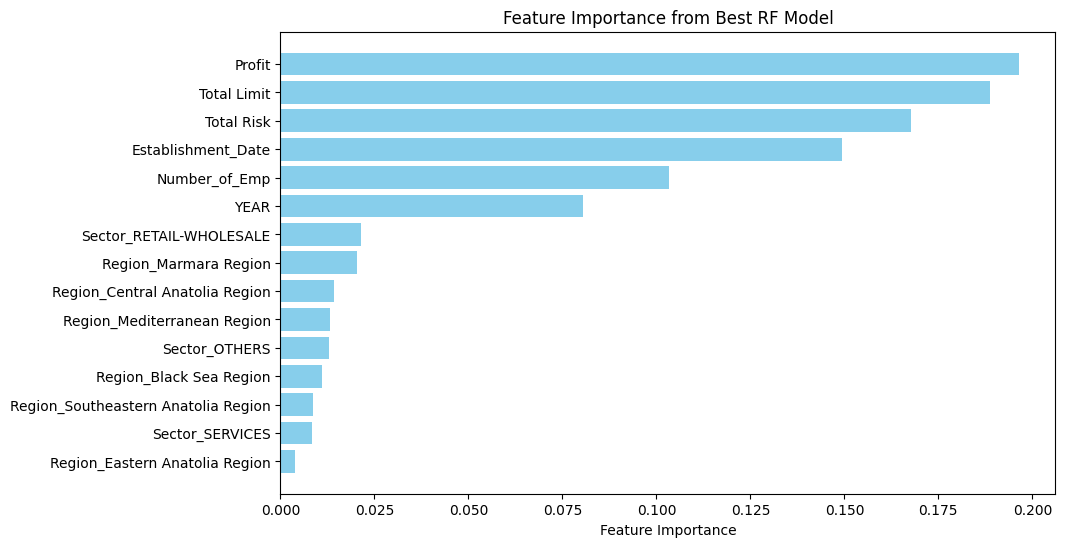

In [74]:
# Get feature importances from the best RF model
importances = rf_model.feature_importances_
feature_names = X_balanced.columns  # using the defined features list

# Create a DataFrame for easy visualization
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)
print(feat_imp_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance from Best RF Model")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()